# TP 4 - Equations différentiellles

Consignes :

- TP à faire par groupes de 2. Le groupe de travail sera le même pour toute l'année.
- Renommer ce fichier <b>nom1-nom2-TP4</b> , en cliquant sur le titre du fichier "TP4-EquaDiff" en haut à gauche
- TP à rendre dans le devoir Teams à la <b>fin de la séance</b>.
- <u>Votre rendu doit contenir des explications. Les notebook avec blocs de code sans aucun contexte seront penalisées.</u>


  Cliquer deux fois sur la cellule pour completer ci-dessous :

- NOM PRENOM : DUMAS Antonin
- NOM PRENOM : ROY Jules


# Equations différentielles

Supposons que l'on souhaite résoudre l'équation différentielle :  $$y'(x)+y(x)=e^{-x}$$

On définit d'abord la variable et la fonction inconnue :

In [11]:
var('x') ;
function('Y')(x) #déclare Y comme fonction de x

Y(x)

Remarque : Pour déclarer $y$ comme fonction de $x$, évitez d'écrire l'assignation $y = function('y',x)$ car alors y désignerait l'expression $y(x)$ et non la fonction!

Puis on utilise l'instruction `desolve` :

In [12]:
desolve(diff(Y(x),x)+Y(x) == e^(-x), Y(x))

(_C + x)*e^(-x)

ou

In [13]:
eq_diff = diff(Y(x),x) + Y(x) - e^(-x)
sol(x) = desolve(eq_diff, Y(x))
sol

x |--> (_C + x)*e^(-x)

La condition initiale $y(0)=1$ est précisé via l'option ICS :

In [14]:
sol_ci(x) = desolve(diff(Y(x),x)+Y(x) == e^(-x), Y(x), ics=[0,1])
sol_ci

x |--> (x + 1)*e^(-x)

Vérifiez enfin que cette fonction est bien solution de l'équation différentielle.

In [15]:
eq_diff.substitute_function(Y,sol_ci)

0

On résout de même les équations différentielles d'ordre 2 :

$$y''(x)+2y'(x)+y(x)=x+1, y(0)=1, y'(0)=2$$

In [16]:
desolve(diff(Y(x),x,2)+2*diff(Y(x),x)+Y(x)==1+x,Y(x),ics=[0,1,2])

(3*x + 2)*e^(-x) + x - 1

La commande `plot_slope_field` permet de représenter le champ de pentes associé à une équation différentielle de la forme
$$ y' = f(x,y). $$

On utilise la commande `plot_slope_field` avec pour argument : le membre de droite $f(x,y)$, l'intervalle de $x$, l'intervalle de $y$.

Remarque : il faut declarer $x,y$ comme variables !


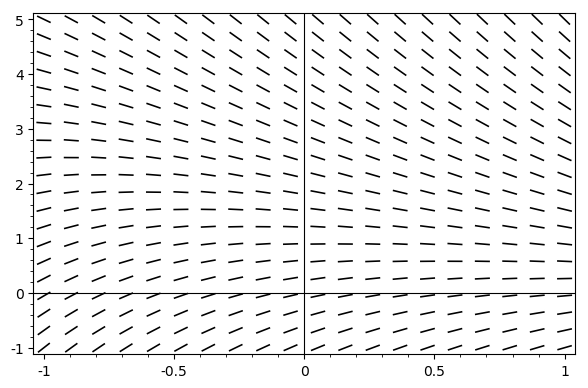

In [17]:
var('x,y')
plot_slope_field(-y+e^(-x),(x,-1,1),(y,-1,5))

# EXERCICE 1

Soit l'équation différentielle :
$$ y'=y+x+2 \qquad (E). $$

En utilisant la commande `desolve` (voir help(desolve)):

a) Résoudre $(E)$.

In [18]:
var('x') # je declare la variable x
y = function('Y')(x) #déclare Y comme fonction de x
eq_diffE = diff(Y(x),x) - Y(x)-x-2 # je definis l'equation
solE(x) = desolve(eq_diffE, Y(x)) # je definis la solution de l'equation et je la stock sur solE(x)
solE # j'affiche la solution

x |--> -((x + 1)*e^(-x) - _C + 2*e^(-x))*e^x

b) Résoudre $(E)$ avec la condition initiale $y(0)=3$

In [19]:
solE_ci(x) = desolve(diff(Y(x),x) ==  Y(x)+x+2,Y(x), ics=[0,3])#je resoud l'equation avec la condition initiale y(0)=3
solE_ci

x |--> -x + 6*e^x - 3

c) Vérifiez que la fonction trouvée au point b) est bien solution de l'équation différentielle $(E)$.

In [20]:
eq_diffE.substitute_function(Y,solE_ci) # je verifie si j'ai la bonne solution 

0

d) Représenter sur le même graphe le champ de pentes associé à $(E)$ ainsi que la courbe intégrale correspondante à la condition initiale.

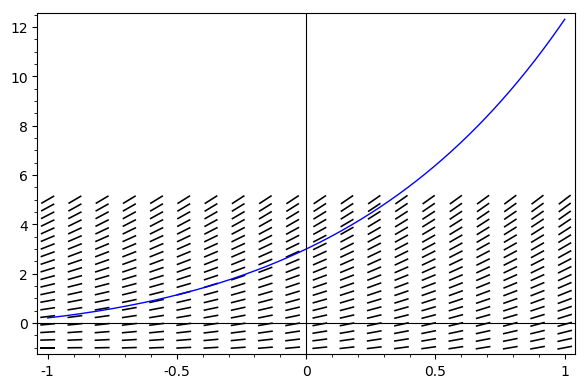

In [63]:
var('x,y') # je definis les variables x et y 
plot(solE_ci(x))+plot_slope_field(y+x+2,(x,-1,1),(y,-1,5)) # j'affiche le champ de pente de l'equation E et la courbe integrale avec pour condition initiale y(0)=3

# EXERCICE 2

On va étudier graphiquement l'équation différentielle
$$y'=-2xy.$$

a) Représenter le champ de pentes associé à cette équation différentielle.

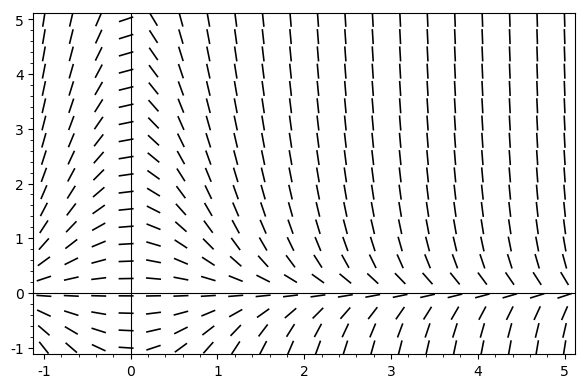

In [62]:
var('x,y') 
plot_slope_field(-2*x*y,(x,-1,5),(y,-1,5)) # j'affiche  le champ de pentes associé à cette équation différentielle.

b) Résoudre l'équation.

In [69]:
var('x') # je declare la variable x
y = function('y')(x) #déclare y comme fonction de x
eq_diffE2 = diff(y(x),x) +2*y(x)*x # je definis l'equation
solE2(x) = desolve(eq_diffE2, y(x)) # je definis la solution de l'equation et je la stock sur solE2(x)
solE2

x |--> _C*e^(-x^2)

c) Tracer, sur un même graphe, les courbes intégrales correspondant aux solutions définies par $y(0)=k$, pour différentes valeurs de $k\in \mathbb{R}$.

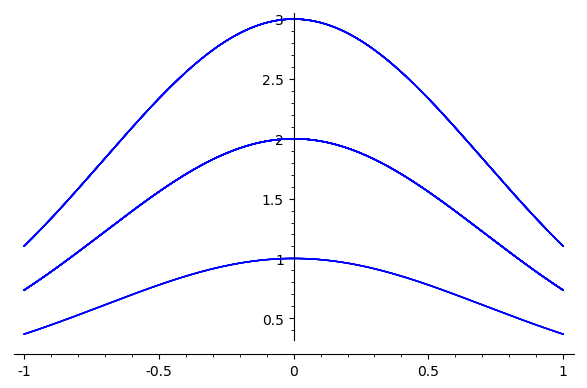

In [71]:
solE2_ci(x) = desolve(diff(y(x),x) ==  -2*x*y(x), y(x), ics=[0,k]) # definis la solution de l'equation
for k in range(1,4): # j'utilise une boucle pour definir plusieurs courbes de l'equation
    img+=plot(solE2_ci(x)) # j'additionne les courbes
img #j'affiche les courbes

# EXERCICE 3

L'équation différentielle
$$x''(t)+fx'(t)+\frac{k}{m}x(t)=0$$
correspond au mouvement d'une masse  $m$  attachée à un ressort de constante  $k>0$  et subissant une force de frottement inversement proportionnelle à sa vitesse multipliée par une constante  $f\geq 0$ 

a) Résoudre et tracer sur l'intervalle $[-1,10]$  les solutions pour différentes valeurs de  $f$  :  $f=0$ ,  $f=1$  et  $f=2$  (et prendre  $k=1$, $m=1$ ), avec les conditions initiales :

$$x(0)=1 \ \text{ et } \ x'(0)=0.$$

In [75]:
# Solution pour f = 0
var('t') ; # je declare la variable t
function('x')(t) #déclare x comme fonction de t
f=var('f')  # je declare la variable f
k=var('k')  # je declare la variable k
m=var('m')  # je declare la variable m
f=0 # j'initialise f a 0
k=1 # j'initialise k a 1
m=1 # j'initialise m a 1
desolve(diff(x(t),t,2)+f*diff(x(t),t)+(k/m)*x(t)==0,x(t),ics=[0,1,0]) # je resoud l'equation pour f=0

cos(t)

In [74]:
# Solution pour f = 1
f=1 # j'initialise f a 1
desolve(diff(x(t),t,2)+f*diff(x(t),t)+(k/m)*x(t)==0,x(t),ics=[0,1,0]) # je resoud l'equation pour f=1

1/3*(sqrt(3)*sin(1/2*sqrt(3)*t) + 3*cos(1/2*sqrt(3)*t))*e^(-1/2*t)

In [73]:
# Solution pour f = 2
f=2 # j'initialise f a 1
desolve(diff(x(t),t,2)+f*diff(x(t),t)+(k/m)*x(t)==0,x(t),ics=[0,1,0]) # je resoud l'equation pour f=2

(t + 1)*e^(-t)

b) A partir des équations obtenues au point précedent, décrire le mouvement de la masse obtenu pour ces trois valeurs de  $f$.

# EXERCICE 4

On considère l'équation différentielle :

$$x^2y'=(x-1)y \qquad (E)$$

a) Caractériser l'équation différentielle $(E)$


In [ ]:
#Caractéristique de l'équation (E)
#((x^2)y') - ((x-1)y) = 0

b) Résoudre $(E)$ sur $\mathbb{R}_+^*$


In [1]:
var('x') #definition de x
function('Y')(x) #definition de y
eq_diff = ((x^2) * diff(Y(x),x)) - ((x - 1) * Y(x)) #on définit l'équation différentielle
sol(x) = desolve(eq_diff, Y(x)) #on résout l'équation
#C est positif car si C est négatif, alors Y l'est aussi
sol()

_C*x*e^(1/x)

b) Trouver la solution vérifiant $y(1)=2$


In [2]:
var('x') #definition de x
function('Y')(x) #definition de y
sol(x) = desolve((x^2) * diff(Y(x),x) == (x-1) * Y(x), Y(x), ics=[1,2]) #on résout l'équation différentielle avec comme condition de départ y(1) = 2
#on note qu'ici nous avons défini notre equation dans la fonction desolve(), et que ics représente y(1) = 2
sol()

2*x*e^(1/x - 1)

c) Peut-on trouver une solution sur $\mathbb{R}$ ?

In [3]:
var('x') #definition de x
function('Y')(x) #definition de y
eq_diff = ((x^2) * diff(Y(x),x)) - ((x - 1) * Y(x))
sol(x) = desolve(eq_diff, Y(x)) #on résout l'équation
sol()
#oui, on peut trouver une solution sur R

_C*x*e^(1/x)

# EXERCICE 5

Résoudre l'équation différentielle suivante :

 $$y''+4y=\sin(2x)+x^2 $$
 
 qui passe par le point $(0,1)$ et admet en ce point une tangente d'équation $y = x$.

In [58]:
x=var('x') # je declare la variable x
y = function('y')(x) #déclare Y comme fonction de x
desolve(diff(y(x),x,2)+4*y(x)==sin(2*x)+x^2,y(x),ics=[0,1])

TypeError: ECL says: Error executing code in Maxima: first: empty argument.